# 회귀 알고리즘

## 필요 라이브러리 임포트

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 캘리포니아 집값 데이터셋 불러오기

In [13]:
'''# boston dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]'''

#for the California housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

'''# for the Ames housing dataset.
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)'''

'# for the Ames housing dataset.\nfrom sklearn.datasets import fetch_openml\nhousing = fetch_openml(name="house_prices", as_frame=True)'

In [15]:
ch_df = pd.DataFrame(housing['data'], columns=housing.feature_names)
ch_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [19]:
x = housing['data']
x.shape

(20640, 8)

In [20]:
y = housing['target']
y.shape

(20640,)

In [25]:
# from sklearn.model_selection import train_test_split
ch_train_x, ch_test_x, ch_train_y, ch_test_y = train_test_split(x, y, test_size=0.2, random_state=0)

print(ch_train_x.shape)
print(ch_test_x.shape)
print(ch_train_y.shape)
print(ch_test_y.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


## Linear Regression 선형 회귀

In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(ch_train_x, ch_train_y)
lr.score(ch_test_x, ch_test_y)

0.594323265246619

<AxesSubplot:>

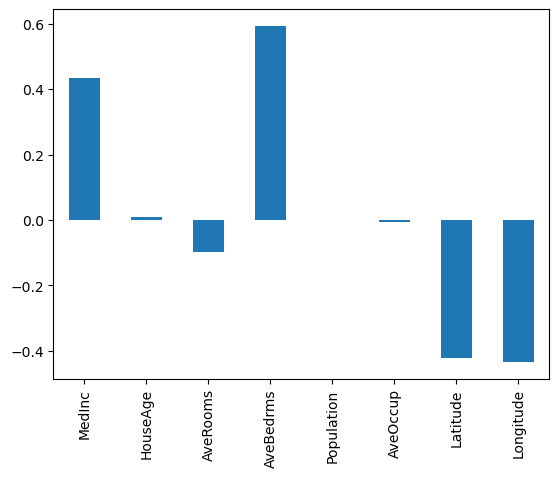

In [30]:
# coef_를 활용해 중요도 그리기
pd.Series(lr.coef_, housing.feature_names).plot(kind='bar')

In [33]:
pred_y = lr.predict(ch_test_x)
test_pred_plot = pd.DataFrame([ch_test_y, pred_y], index=['true', 'pred'])
test_pred_plot

,0,1,2,3,4,5,6,7,8,9,...,4118,4119,4120,4121,4122,4123,4124,4125,4126,4127
true,1.369000,2.413000,2.007000,0.725000,4.600000,1.20000,2.470000,3.369000,3.397000,2.65600,...,0.542000,2.308000,0.725000,2.407000,2.983000,1.695000,2.046000,1.28600,2.595000,1.676000
pred,2.281107,2.790091,1.903328,1.017603,2.948524,2.09054,2.991239,3.056619,2.980227,2.38806,...,0.801716,1.872108,1.252943,2.097599,2.760889,1.616753,2.409188,0.84187,2.798495,2.217793


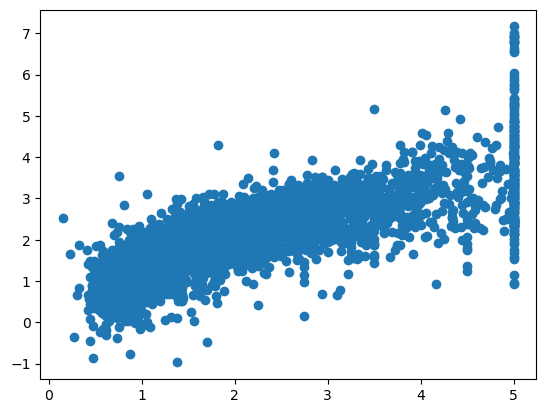

In [34]:
plt.scatter(ch_test_y, pred_y)

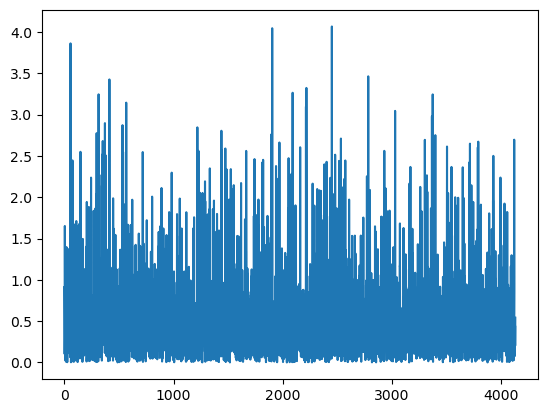

In [39]:
plt.plot(abs(ch_test_y - pred_y))

In [40]:
result = dict()

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(ch_train_x, ch_train_y)
result['LinearRegression'] = lr.score(ch_test_x, ch_test_y)

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.5, random_state=0)
ridge.fit(ch_train_x, ch_train_y)
result['Ridge'] = ridge.score(ch_test_x, ch_test_y)

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.5, random_state=0)
lasso.fit(ch_train_x, ch_train_y)
result['Lasso'] = lasso.score(ch_test_x, ch_test_y)

from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=.5, random_state=0)
elasticnet.fit(ch_train_x, ch_train_y)
result['ElasticNet'] = elasticnet.score(ch_test_x, ch_test_y)

In [45]:
pd.Series(result).sort_values(ascending=False)

LinearRegression    0.594323
Ridge               0.594315
ElasticNet          0.466729
Lasso               0.437405
dtype: float64

## 연습 문제
1. abs(ch_test_y - pred_y)의 결과를 히스토그램으로 오차를 표현해보자.
2. 전처리를 수행하고 결과를 확인해보자.
3. Alpha를 \[1.0, 0.1, 0.01, 0.001\] 값으로 각각의 알고리즘 결과를 확인해보자. 

<AxesSubplot:>

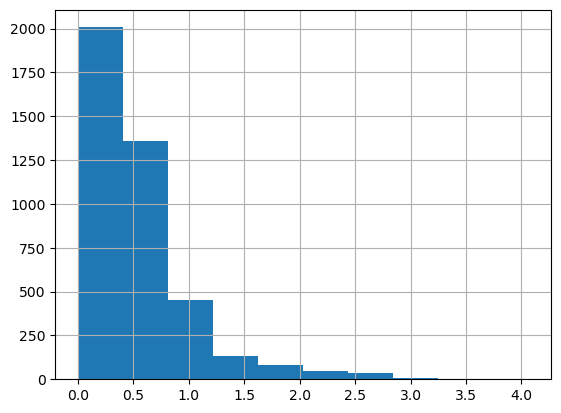

In [47]:
pd.Series(abs(ch_test_y - pred_y)).hist(bins=10)

In [50]:
from sklearn.preprocessing import StandardScaler

ch_x_sc = StandardScaler()
sc_ch_train_x = ch_x_sc.fit_transform(ch_train_x)
sc_ch_test_x = ch_x_sc.transform(ch_test_x)

In [51]:
sc_ch_test_x

array([[ 1.44489405e-01, -5.25296884e-01,  9.13337520e-02, ...,
         1.78551337e-01, -1.42513494e+00,  1.25325150e+00],
       [ 9.98204241e-01,  2.68315039e-01,  2.67351908e-01, ...,
        -1.48094957e-03, -7.97937179e-01,  7.94442248e-01],
       [ 2.47755440e-01,  3.02314620e-02,  1.97399137e-01, ...,
        -1.86932108e-02,  1.41597731e+00, -1.13554886e+00],
       ...,
       [-3.53274909e-01, -1.39827000e+00, -6.20341805e-02, ...,
        -6.56957889e-02,  1.51426949e+00, -6.76739606e-01],
       [ 1.18910742e+00, -8.42741654e-01,  7.49373432e-01, ...,
        -2.54935860e-02,  1.09301727e+00, -1.19040649e+00],
       [-2.85147647e-01,  1.85553889e+00, -6.10691521e-01, ...,
         8.85661224e-02, -7.04325572e-01,  6.79739934e-01]])

In [52]:
alphas = [1.0, 0.1, 0.01, 0.001] 
result = dict()

# 스탠다드 스케일러 전
for alpha in alphas:
    result[alpha] = dict()
    from sklearn.linear_model import Ridge
    ridge = Ridge(alpha=alpha, random_state=0)
    ridge.fit(ch_train_x, ch_train_y)
    result[alpha]['Ridge'] = ridge.score(ch_test_x, ch_test_y)

    from sklearn.linear_model import Lasso
    lasso = Lasso(alpha=alpha, random_state=0)
    lasso.fit(ch_train_x, ch_train_y)
    result[alpha]['Lasso'] = lasso.score(ch_test_x, ch_test_y)

    from sklearn.linear_model import ElasticNet
    elasticnet = ElasticNet(alpha=alpha, random_state=0)
    elasticnet.fit(ch_train_x, ch_train_y)
    result[alpha]['ElasticNet'] = elasticnet.score(ch_test_x, ch_test_y)
    
pd.DataFrame(result)

,1.000,0.100,0.010,0.001
Ridge,0.594308,0.594322,0.594323,0.594323
Lasso,0.280957,0.524819,0.585918,0.593801
ElasticNet,0.409049,0.557313,0.589540,0.593936


In [ ]:
alphas = [1.0, 0.1, 0.01, 0.001] 
result = dict()

# 스탠다드 스케일러 후
for alpha in alphas:
    result[alpha] = dict()
    from sklearn.linear_model import Ridge
    ridge = Ridge(alpha=alpha, random_state=0)
    ridge.fit(sc_ch_train_x, ch_train_y)
    result[alpha]['Ridge'] = ridge.score(sc_ch_test_x, ch_test_y)

    from sklearn.linear_model import Lasso
    lasso = Lasso(alpha=alpha, random_state=0)
    lasso.fit(sc_ch_train_x, ch_train_y)
    result[alpha]['Lasso'] = lasso.score(sc_ch_test_x, ch_test_y)

    from sklearn.linear_model import ElasticNet
    elasticnet = ElasticNet(alpha=alpha, random_state=0)
    elasticnet.fit(ch_train_x, ch_train_y)
    result[alpha]['ElasticNet'] = elasticnet.score(ch_test_x, ch_test_y)
    
pd.DataFrame(result)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(ch_train_x, ch_train_y)
result['LinearRegression'] = lr.score(ch_test_x, ch_test_y)